## Classification Algorithms on Occupancy Data

Here, I will try to find a classification algorithm that best predicts whether a room is occupied based on numerous parameters. For that I will do the following things

1. Visualize data 
2. Use cross validation to select best classifcation method
3. Find the best model


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

data = pd.read_csv('datatraining.txt')

In [2]:
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


Creating a parameter and predictor set

In [6]:
X = pd.DataFrame(data,columns=['Temperature','Humidity','Light','CO2','HumidityRatio'])
y = pd.DataFrame(data,columns=['Occupancy'])

In [7]:
X.head()

,Temperature,Humidity,Light,CO2,HumidityRatio
1,23.18,27.2720,426.0,721.25,0.004793
2,23.15,27.2675,429.5,714.00,0.004783
3,23.15,27.2450,426.0,713.50,0.004779
4,23.15,27.2000,426.0,708.25,0.004772
5,23.10,27.2000,426.0,704.50,0.004757


In [8]:
y.head()

,Occupancy
1,1
2,1
3,1
4,1
5,1


### Visualizing the datasets

A lot of insight can be gained into the data just by plotting the various parameters.
So lets plot a few graphs.

First divide the data into occupied and not occupied sets. (Easier to visualize)

Text(0,0.5,u'Humidity')

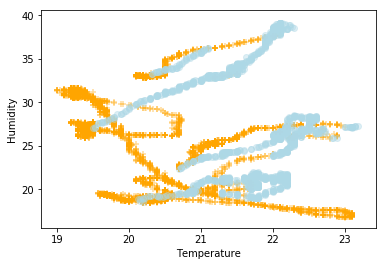

In [11]:
occ = data[data.Occupancy==1]
no_occ = data[data.Occupancy==0]

plt.scatter(no_occ.Temperature,no_occ.Humidity,c='orange',marker='+',alpha=0.4)
plt.scatter(occ.Temperature,occ.Humidity,c='lightblue',marker='o',alpha=0.4)
plt.xlabel('Temperature')
plt.ylabel('Humidity')

No discernible pattern.

Let's try some other parameters

Text(0,0.5,u'CO2')

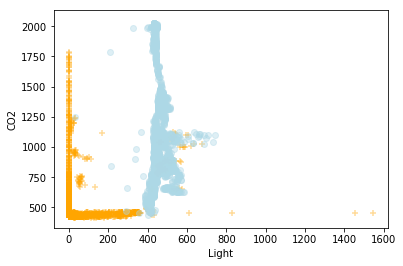

In [12]:
plt.scatter(no_occ.Light,no_occ.CO2,c='orange',marker='+',alpha=0.4)
plt.scatter(occ.Light,occ.CO2,c='lightblue',marker='o',alpha=0.4)
plt.xlabel('Light')
plt.ylabel('CO2')

OK. So here we can deduce that whenever there is light in the data, there is a very high chance that the room is occupied.

Lets try one more combination

Text(0,0.5,u'HumidityRatio')

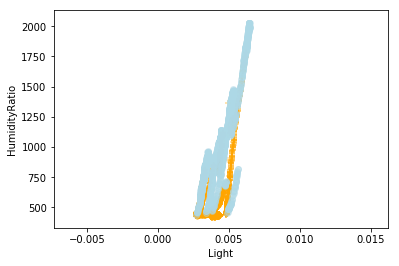

In [13]:
plt.scatter(no_occ.HumidityRatio,no_occ.CO2,c='orange',marker='+',alpha=0.4)
plt.scatter(occ.HumidityRatio,occ.CO2,c='lightblue',marker='o',alpha=0.4)
plt.xlabel('Light')
plt.ylabel('HumidityRatio')

Looking at this graph it would be difficult to guess whether a room occupied or not, based just on the Humidity Ratio and Light.

### Cross Validation

We will try 

### 1. Logistic Regression

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
lm = linear_model.LogisticRegression()

In [15]:
scores = cross_val_score(lm,X,y,cv=5)

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
scores

array([0.96009822, 0.98895028, 0.99693063, 0.99938613, 0.98586355])

In [17]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.99 (+/- 0.03)


Let's try how this works on our test dataset.

In [30]:
test_data = pd.read_csv('datatest.txt')
X_test = pd.DataFrame(test_data,columns=['Temperature','Humidity','Light','CO2','HumidityRatio'])
y_test = pd.DataFrame(test_data,columns=['Occupancy'])

In [31]:
lr_model = lm.fit(X,y)

In [41]:
lm.score(X_test,y_test)

0.9782363977485928

In [45]:
y_pred = lm.predict(X_test)
mean_squared_error(y_test,y_pred)

0.02176360225140713

### 2. Linear Discriminant Analysis

In [18]:
from sklearn import discriminant_analysis

In [19]:
lda = discriminant_analysis.LinearDiscriminantAnalysis()

In [20]:
scores = cross_val_score(lda,X,y,cv=5)

In [21]:
scores

array([0.96071209, 0.98895028, 0.88336403, 0.99263352, 0.9649662 ])

In [23]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.08)


In [42]:
lda_model = lda.fit(X,y)
lda.score(X_test,y_test)

0.9789868667917448

In [48]:
y_pred = lda.predict(X_test)
mean_squared_error(y_test,y_pred)

0.02101313320825516


### 3. Quadratic Discriminant Analysis

In [24]:
qda = discriminant_analysis.QuadraticDiscriminantAnalysis()
scores = cross_val_score(qda,X,y,cv=5)

In [25]:
scores

array([0.96071209, 0.97483118, 0.88643339, 0.99938613, 0.9409957 ])

In [26]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.08)


In [43]:
qda_model = qda.fit(X,y)
qda.score(X_test,y_test)

0.9774859287054409

In [50]:
y_pred = qda.predict(X_test)
mean_squared_error(y_test,y_pred)

0.0225140712945591

### 4. K Nearest Neighbor

In [27]:
from sklearn import neighbors

In [28]:
knn = neighbors.KNeighborsClassifier()
scores = cross_val_score(knn,X,y,cv=5)
scores

/anaconda2/lib/python2.7/site-packages/sklearn/model_selection/_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.96009822, 0.97851443, 0.8422345 , 0.99877225, 0.97172711])

In [29]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.95 (+/- 0.11)


In [51]:
knn_model = knn.fit(X,y)
knn.score(X_test,y_test)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


0.9425891181988743

In [52]:
y_pred = knn.predict(X_test)
mean_squared_error(y_test,y_pred)

0.057410881801125704

### Observations

Based on the R^2 and MSE values, we can say a few things
1. On the training data, Logistic Regression, LDA, and QDA all seem to work with pretty much the same.
2. When we tried these fitted models on the test data, we see they pretty much gave similar results.
3. Suprisingly KNN was the wekeast performing methods


## Model Selection

Till now we have used all the parameters available to us to make the above models. But could be build a model with similar accuracy but with fewer parameters? Lets explore this. 

First we will use statsmodel to get some basic statistics about the data

In [53]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
stats = smf.ols('Occupancy ~ Temperature + Humidity + Light + CO2 + HumidityRatio', data).fit()
stats.summary().tables[1]

/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,3.5329,0.236,14.994,0.000,3.071,3.995
Temperature,-0.1766,0.011,-15.664,0.000,-0.199,-0.154
Humidity,-0.0789,0.007,-10.680,0.000,-0.093,-0.064
Light,0.0018,1.46e-05,124.718,0.000,0.002,0.002
CO2,0.0002,1.41e-05,16.269,0.000,0.000,0.000
HumidityRatio,515.9816,49.817,10.358,0.000,418.328,613.636


If we look at the P values, all of them are very small. So apparently all the parameters are necessary. But we will do some further analysis.